In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
# !cp -r /content/drive/MyDrive/Gcn/C_NC_csv_data/c_nc_averaged_dropped_null.pkl /content/

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
# import pickle
import networkx as nx

C:\Users\nbnsu\anaconda3\envs\tfpose\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nbnsu\anaconda3\envs\tfpose\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nbnsu\anaconda3\envs\tfpose\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nbnsu\anaconda3\envs\tfpose\lib\site-packages\tensorflow\pyth

In [2]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Flatten,Input,Activation,Dropout,BatchNormalization,GlobalAveragePooling2D,Lambda,Layer,PReLU,LeakyReLU

Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
df=pd.read_pickle('GCN/c_nc_averaged_dropped_null.pkl')
# df = pickle.load(open('c_nc_averaged_dropped_null.pkl', "rb"))
lookup = {"C": 1, "NC": 0}
df = df.rename(columns={"keypoints": "X", "C/NC": "Y"})
df["Y"] = df.Y.apply(lambda x: lookup.get(x))

In [5]:
X = np.stack(list(df["X"]))
X = X.reshape(-1, 300, 25, 2)
X[:, :, :, 0] /= 1920.0
X[:, :, :, 1] /= 1080.0
Y=df['Y'].values

In [6]:
A=[    
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0],
    [1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],    
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],    
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],    
    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],    
    [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],    
    [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],    
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],    
    [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],    
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],    
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],    
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1],    
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],    
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],    
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0],    
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0],    
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0],    
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0],    
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0],    
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0],    
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0],    
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],    
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0],    
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1]
    
]
A = np.array(A , dtype='float')
# A_300 = np.stack([A for _ in range(300)])
# A_300_t=tf.convert_to_tensor(A_300,dtype='float32')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
## A_300=A_300.numpy()
# for s in range(A_300.shape[0]):
#     G = nx.from_numpy_matrix(A_300[s,:,:])
#     A_300[s,:,:] = nx.normalized_laplacian_matrix(G).toarray()
# A=A_300[0]

In [8]:
G= nx.from_numpy_matrix(A)
A= nx.normalized_laplacian_matrix(G).toarray()

In [ ]:
# X_train=X_train.transpose(0,3,1,2)
# X_train=np.einsum('nctv,tvw->nctw', X_train, A_300)
# X_train=X_train.transpose(0,3,1,2)

In [9]:
y_test.shape

(82,)

In [10]:

def get_einsum(x,temporal=300):
  A_stack = np.stack([A for _ in range(temporal)])
  A_stack = tf.convert_to_tensor(A_stack,dtype='float')
  x=tf.transpose(x,perm=[0,3,1,2])
  x=tf.einsum('nctv,tvw->nctw', x, A_stack)
  x=tf.transpose(x,perm=[0,2,3,1])
  return x

def change_shape(x):
  x=tf.transpose(x,perm=[0,1,3,2])
  return x

In [11]:

i=Input(shape=(300,25,2))

x=Lambda(get_einsum , arguments={'temporal':300})(i)
x=Conv2D(filters=64,kernel_size=(3,3),padding='same')(x)
x=LeakyReLU()(x)
# x=Activation('relu')(x)
x=Dropout(0.5)(x)

# x=Einsum(A,64,activation='relu')(x)
# x=Lambda(get_einsum , arguments={'temporal':300})(x)
# x=Conv2D(filters=32,kernel_size=(5,5),padding='same')(x)
# x=Activation('relu')(x)
# x=Dropout(0.2)(x)

# x=Einsum(A,32,activation='relu')(x)
# x=Lambda(get_einsum , arguments={'temporal':300})(x)
# x=Conv2D(filters=16,kernel_size=(5,5),padding='same')(x)
# x=Activation('relu')(x)
# x=Dropout(0.2)(x)


x=Lambda(get_einsum , arguments={'temporal':300})(x)
x=Conv2D(filters=32,kernel_size=(3,3),padding='same')(x)
x=LeakyReLU()(x)
# x=Activation('relu')(x)
x=Dropout(0.5)(x)

x=Lambda(get_einsum , arguments={'temporal':300})(x)
x=Conv2D(filters=16,kernel_size=(5,5),padding='same')(x)
x=LeakyReLU()(x)
x=Dropout(0.2)(x)

x=Lambda(change_shape)(x)
x=GlobalAveragePooling2D()(x)

# x=Flatten()(x)
x=Dense(units=10)(x)
x=LeakyReLU()(x)
# x=Activation('relu')(x)
x=Dropout(0.2)(x)
x=Dense(units=1)(x)
x=Activation('sigmoid')(x)

model=Model(inputs=i,outputs=x)

In [ ]:
# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=100000,
#     decay_rate=0.9)
# optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
model.optimizer.learning_rate.numpy()

0.00018315602

In [ ]:
def scheduler(epoch, lr):
  if epoch < 200:
    return lr
  elif epoch % 10 == 0 :
    return lr * tf.math.exp(-0.1)   
  else:
    return lr 

callback = keras.callbacks.LearningRateScheduler(scheduler)
model.fit(X_train,y_train,verbose=1,epochs=400,validation_data=(X_test,y_test),callbacks=[callback])

Epoch 1/400
11/11 [==============================] - 1s 54ms/step - loss: 0.3074 - accuracy: 0.8933 - val_loss: 0.3343 - val_accuracy: 0.8293
Epoch 2/400
11/11 [==============================] - 1s 46ms/step - loss: 0.2936 - accuracy: 0.8689 - val_loss: 0.3482 - val_accuracy: 0.8415
Epoch 3/400
11/11 [==============================] - 1s 46ms/step - loss: 0.3137 - accuracy: 0.8750 - val_loss: 0.3365 - val_accuracy: 0.8415
Epoch 4/400
11/11 [==============================] - 1s 47ms/step - loss: 0.2978 - accuracy: 0.8720 - val_loss: 0.3017 - val_accuracy: 0.8537
Epoch 5/400
11/11 [==============================] - 1s 46ms/step - loss: 0.2511 - accuracy: 0.8902 - val_loss: 0.3592 - val_accuracy: 0.8780
Epoch 6/400
11/11 [==============================] - 0s 46ms/step - loss: 0.2601 - accuracy: 0.8963 - val_loss: 0.3234 - val_accuracy: 0.8659
Epoch 7/400
11/11 [==============================] - 1s 46ms/step - loss: 0.2674 - accuracy: 0.8963 - val_loss: 0.3218 - val_accuracy: 0.8659
Epoch 

In [ ]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 12ms/step - loss: 0.4555 - accuracy: 0.8162


[0.4554952383041382, 0.8161764740943909]

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 300, 25, 2)]      0         
_________________________________________________________________
lambda_8 (Lambda)            (None, 300, 25, 2)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 300, 25, 64)       1216      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 300, 25, 64)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 300, 25, 64)       0         
_________________________________________________________________
lambda_9 (Lambda)            (None, 300, 25, 64)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 300, 25, 32)       1846

In [ ]:
losses_0=pd.DataFrame(model.history.history)

In [ ]:
losses_0

,loss,accuracy,val_loss,val_accuracy,lr
0,0.307415,0.893293,0.334320,0.829268,0.001353
1,0.293557,0.868902,0.348164,0.841463,0.001353
2,0.313652,0.875000,0.336537,0.841463,0.001353
3,0.297824,0.871951,0.301667,0.853659,0.001353
4,0.251066,0.890244,0.359233,0.878049,0.001353
...,...,...,...,...,...
395,0.227813,0.902439,0.262979,0.878049,0.000183
396,0.232341,0.908537,0.263381,0.878049,0.000183
397,0.236887,0.902439,0.267760,0.878049,0.000183
398,0.237374,0.917683,0.265159,0.878049,0.000183


In [ ]:
losses

,loss,accuracy,val_loss,val_accuracy,lr
0,0.695365,0.557927,0.688992,0.548781,0.010000
1,0.671833,0.631098,0.686268,0.548781,0.010000
2,0.661831,0.637195,0.694567,0.548781,0.010000
3,0.639692,0.649390,0.678049,0.573171,0.010000
4,0.635067,0.649390,0.648871,0.609756,0.010000
...,...,...,...,...,...
595,0.255495,0.908537,0.325322,0.853659,0.001353
596,0.294429,0.896341,0.316837,0.841463,0.001353
597,0.280770,0.881098,0.345680,0.841463,0.001353
598,0.267945,0.905488,0.314499,0.853659,0.001353


In [ ]:
new_loss=pd.concat([losses,losses_0],ignore_index=True)

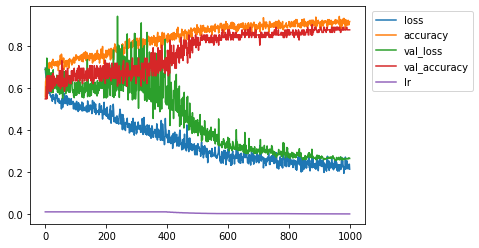

In [ ]:
new_loss.plot() 
plt.legend(loc='upper left',bbox_to_anchor=(1.005, 1))

In [ ]:
new_loss.to_pickle('/content/drive/MyDrive/Gcn/C_NC_csv_data/send_loss_acc.pkl')

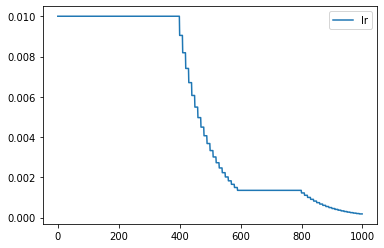

In [ ]:
new_loss[['lr']].plot() 

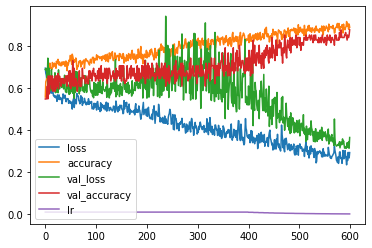

In [ ]:
losses.plot()

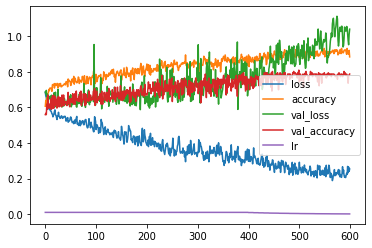

In [ ]:
losses.plot()

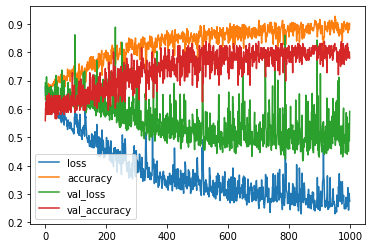

In [ ]:
losses.plot()

In [13]:
prediction=model.predict(X_test)
prediction=prediction>0.5

In [15]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85        37
           1       0.84      0.96      0.90        45

    accuracy                           0.88        82
   macro avg       0.89      0.87      0.87        82
weighted avg       0.88      0.88      0.88        82



In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        37
           1       0.89      0.89      0.89        45

    accuracy                           0.88        82
   macro avg       0.88      0.88      0.88        82
weighted avg       0.88      0.88      0.88        82



In [ ]:
## Custom layers keras: 

class SimpleDense(Layer):
  '''Simple dense layer custom built'''
  def __init__(self,units,activation=None):
    super(SimpleDense,self).__init__()
    self.units=units
    self.activation=keras.activations.get(activation)
  
  def build(self,input_shape):
    w_init = tf.random_normal_initializer()
    self.w = tf.Variable(name='kernel',initial_value=w_init(shape=(input_shape[-1],self.units),dtype='float32'),trainable=True)
    b_init = tf.zeros_initializer()
    self.b = tf.Variable(name='bias',initial_value=b_init(shape=(self.units),dtype='float32'),trainable=True)
    super().build(input_shape)
  def call(self,inputs):
    return self.activation(tf.matmul(inputs,self.w)+self.b)


class Einsum(Layer):
  def __init__(self,adj,features,activation=None):
    super(Einsum,self).__init__()
    self.features=features
    self.activation=keras.activations.get(activation)
    self.A_stack = tf.convert_to_tensor(np.stack([adj for _ in range(300)]),dtype='float')
  
  def build(self,input_shape):
    w_init = tf.random_normal_initializer()
    self.w = tf.Variable(name='kernel',initial_value=w_init(shape=(25,self.features),dtype='float32'),trainable=True)
    b_init = tf.zeros_initializer()
    self.b = tf.Variable(name='bias',initial_value=b_init(shape=(self.features),dtype='float32'),trainable=True)
    super().build(input_shape)

  def call(self,inputs):
    inputs=tf.transpose(inputs,perm=[0,3,1,2])
    inputs=tf.einsum('nctv,tvw->nctw', inputs, self.A_stack)
    inputs=tf.transpose(inputs,perm=[0,2,3,1])
    return self.activation(tf.multiply(inputs,self.w)+self.b)

## Save and Load model weights

In [ ]:
model.save_weights('./checkpointts/my_checkpoint')

In [ ]:
!cp -r /content/checkpointts /content/drive/MyDrive/Gcn/C_NC_csv_data/chkpnt_e600_t80_d400/

In [ ]:
!rm -r checkpointts/

In [13]:
model.load_weights('/content/drive/MyDrive/Gcn/C_NC_csv_data/chkpnt_e600_t80_d400/my_checkpoint')

In [12]:
model.load_weights('GCN/my_checkpoint.h5')

## Save and Load whole Model 

In [57]:
model.save('./whole_model/my_checkpoint')

In [58]:
!cp -r /content/whole_model /content/drive/MyDrive/Gcn/C_NC_csv_data/whole_model_e600_t80_d400/

In [16]:
model=keras.models.load_model('/content/drive/MyDrive/Gcn/C_NC_csv_data/whole_model_e600_t80_d400/my_checkpoint')

In [53]:
a= np.expand_dims(X[200],axis=0)

In [54]:
a.shape

(1, 300, 25, 2)

In [55]:
res=model.predict(a)

In [56]:
res>0.5

array([[ True]])

In [52]:
Y[200]

1